In [ ]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/green_tech_data.csv')

In [ ]:
print(df.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [ ]:
print(df.tail())

    carbon_emissions  energy_output  renewability_index  cost_efficiency  \
95        222.828459     414.288617            0.522243         4.688408   
96        232.956490     753.360111            0.769994         4.362857   
97        199.639356     907.399234            0.215821         2.430473   
98         58.896694     898.377782            0.622890         3.878920   
99         87.761999     801.887991            0.085347         3.895443   

    sustainability  
95               0  
96               0  
97               0  
98               0  
99               0  


In [ ]:
print(df.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None


In [ ]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df= df.dropna()

In [ ]:
X = df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
Y = df['sustainability']

In [ ]:
X


,carbon_emissions,energy_output,renewability_index,cost_efficiency
0,181.089042,128.286267,0.642032,0.732568
1,382.750007,672.769370,0.084140,2.891096
2,306.197880,382.920383,0.161629,2.932858
3,259.530469,557.713622,0.898554,3.368435
4,104.606524,916.809827,0.606429,3.767411
...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408
96,232.956490,753.360111,0.769994,4.362857
97,199.639356,907.399234,0.215821,2.430473
98,58.896694,898.377782,0.622890,3.878920


In [ ]:
Y

,sustainability
0,1
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:

X_train

,carbon_emissions,energy_output,renewability_index,cost_efficiency
55,372.655982,317.849744,0.556801,3.390887
88,360.524460,576.685521,0.286541,3.877766
26,119.885824,836.213289,0.973011,2.994593
42,62.035982,547.523655,0.914864,1.279408
69,395.410428,631.803649,0.293592,0.812126
...,...,...,...,...
60,186.037051,431.004819,0.615007,2.246765
71,119.550489,114.929046,0.810113,0.581998
14,113.638739,670.063381,0.712179,4.261911
92,316.274767,910.376251,0.822601,2.174081


In [ ]:
Y_train

,sustainability
55,0
88,0
26,1
42,1
69,0
...,...
60,1
71,1
14,0
92,0


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

Precision: 1.0


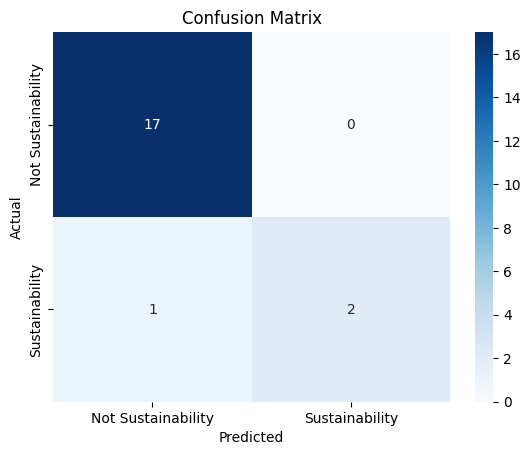

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=['Not Sustainability', 'Sustainability'],
            yticklabels=['Not Sustainability', 'Sustainability'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred,target_names=['Not Sustainability', 'Sustainability']))

                    precision    recall  f1-score   support

Not Sustainability       0.94      1.00      0.97        17
    Sustainability       1.00      0.67      0.80         3

          accuracy                           0.95        20
         macro avg       0.97      0.83      0.89        20
      weighted avg       0.95      0.95      0.95        20



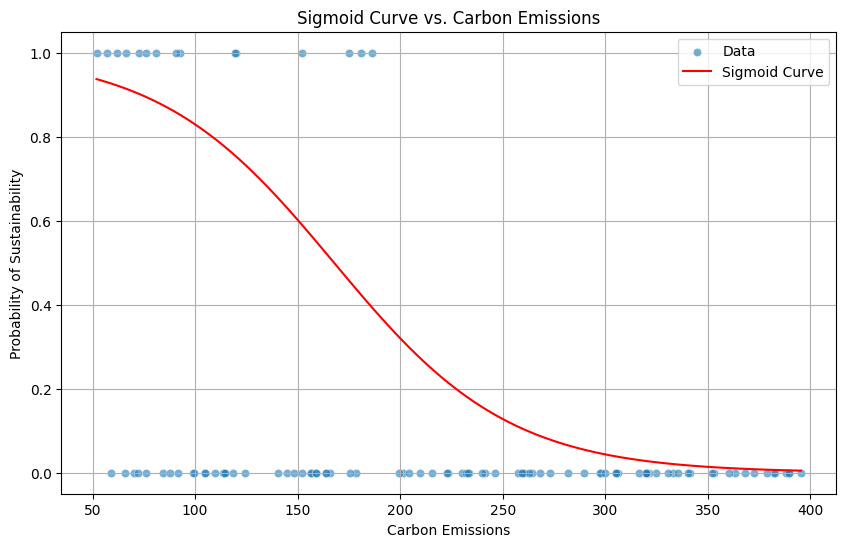

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carbon_emissions', y='sustainability', data=df, alpha=0.6, label='Data')

intercept = model.intercept_[0]
coeff = model.coef_[0][0] # Assuming 'carbon_emissions' is the first feature

# Generate x values for the sigmoid curve
x_values = np.linspace(df['carbon_emissions'].min(), df['carbon_emissions'].max(), 100)

# Calculate the probability (y_values) using the sigmoid function: 1 / (1 + exp(-(intercept + coeff * x)))
y_values = 1 / (1 + np.exp(-(intercept + coeff * x_values)))

plt.plot(x_values, y_values, color='red', label='Sigmoid Curve')

plt.xlabel('Carbon Emissions')
plt.ylabel('Probability of Sustainability')
plt.title('Sigmoid Curve vs. Carbon Emissions')
plt.legend()
plt.grid(True)
plt.show()

new folder from now

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X=df[['User ID',	'Gender',	'Age',	'EstimatedSalary']]
Y=df['Purchased']

In [ ]:
X


,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [ ]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,User ID,Gender,Age,EstimatedSalary
3,15603246,Female,27,57000
18,15704583,Male,46,28000
202,15735549,Female,39,134000
250,15810075,Female,44,39000
274,15692819,Female,57,26000
...,...,...,...,...
71,15726358,Female,24,27000
106,15706185,Female,26,35000
270,15680752,Female,43,133000
348,15579212,Male,39,77000


In [ ]:
Y_train

,Purchased
3,0
18,1
202,1
250,0
274,1
...,...
71,0
106,0
270,0
348,0


In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)

model = LogisticRegression()
model.fit(X_train_encoded, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test_encoded)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875


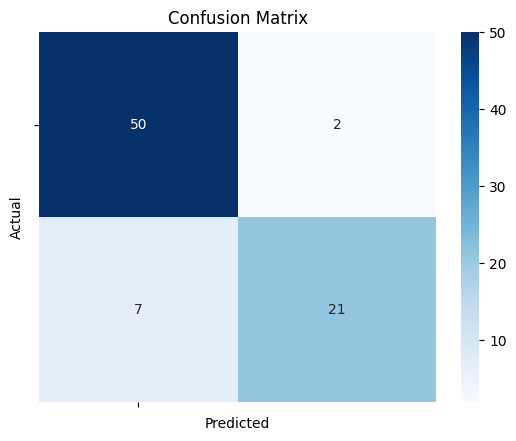

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=[''],
            yticklabels=[''])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred,target_names=['Actual', 'Predicted']))

              precision    recall  f1-score   support

      Actual       0.88      0.96      0.92        52
   Predicted       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



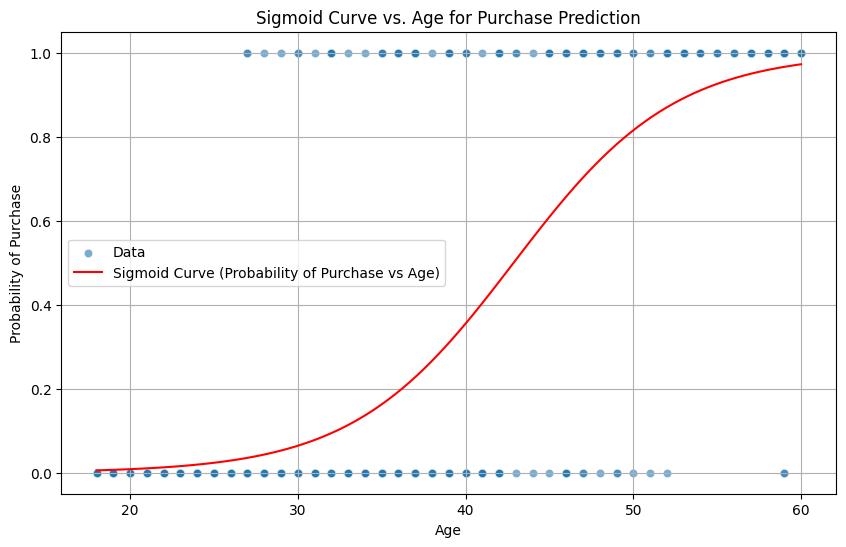

In [ ]:

age_range = np.linspace(X_train_encoded['Age'].min(), X_train_encoded['Age'].max(), 100)
x_predict_social_age = pd.DataFrame({'Age': age_range,
                                     'EstimatedSalary': X_train_encoded['EstimatedSalary'].mean(),
                                     'Gender_Male': X_train_encoded['Gender_Male'].mode()[0]
                                    })


y_prob_social_age = model.predict_proba(x_predict_social_age)[:, 1]

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Age', y='Purchased', data=df, alpha=0.6, label='Data')

plt.plot(age_range, y_prob_social_age, color='red', label='Sigmoid Curve (Probability of Purchase vs Age)')

plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Sigmoid Curve vs. Age for Purchase Prediction')
plt.legend()
plt.grid(True)
plt.show()